**Due: 4 PM on Wednesday, 24 Feb 2016**

The usual warnings apply - the homework is not officially released until 18 Feb 2016, and we may make changes till then.

Instructions
-----

Write code to solve all problems. The grading rubric includes the following criteria:

- Correctness
- Readability
- Efficiency

Please do not copy answers found on the web or elsewhere as it will not benefit your learning. Searching the web for general references etc is OK. Some discussion with friends is fine too - but again, do not just copy their answer. 

**Honor Code: By submitting this assignment, you certify that this is your original work.**

In [122]:
from sympy import symbols, hessian, Function, N, exp, Matrix, diff, init_printing, solve
from scipy import optimize
init_printing(use_latex = "mathjax")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Question 1 (25 points).** Consider the following function on $\mathbb{R}^2$:

$$f(x_1,x_2) = -x_1x_2e^{-\frac{(x_1^2+x_2^2)}{2}}$$

1. Use `sympy` to compute its gradient.
2. Compute the Hessian matrix. 
3. Find the critical points of $f$.
4. Characterize the critical points as max/min or neither. 
5. Find the minimum under the constraint 
$$g(x) = x_1^2+x_2^2 \leq 10$$
and 
$$h(x) = 2x_1 + 3x_2 = 5$$ using `scipy.optimize.minimize`.
5. Plot the function using `matplotlib`.


In [123]:
# Q1
x1, x2 = symbols('x1 x2')
f = symbols('f', cls=Function)
f = -x1*x2*exp(-(x1**2+x2**2)/2)
gradient = Matrix([[diff(f, x1)],[diff(f,x2)]])
gradient

⎡            2     2           2     2⎤
⎢          x₁    x₂          x₁    x₂ ⎥
⎢        - ─── - ───       - ─── - ───⎥
⎢  2        2     2           2     2 ⎥
⎢x₁ ⋅x₂⋅ℯ            - x₂⋅ℯ           ⎥
⎢                                     ⎥
⎢            2     2           2     2⎥
⎢          x₁    x₂          x₁    x₂ ⎥
⎢        - ─── - ───       - ─── - ───⎥
⎢     2     2     2           2     2 ⎥
⎣x₁⋅x₂ ⋅ℯ            - x₁⋅ℯ           ⎦

In [124]:
# Q2
H = Matrix([[diff(gradient[0],x1),diff(gradient[0],x2)],
                  [diff(gradient[1],x1), diff(gradient[1],x2)]])
H

⎡                             2     2                2     2                  
⎢                           x₁    x₂               x₁    x₂                   
⎢                         - ─── - ───            - ─── - ───                  
⎢                   3        2     2                2     2                   
⎢               - x₁ ⋅x₂⋅ℯ            + 3⋅x₁⋅x₂⋅ℯ                             
⎢                                                                             
⎢               2     2            2     2            2     2        2     2  
⎢             x₁    x₂           x₁    x₂           x₁    x₂       x₁    x₂   
⎢           - ─── - ───        - ─── - ───        - ─── - ───    - ─── - ───  
⎢    2   2     2     2      2     2     2      2     2     2        2     2   
⎣- x₁ ⋅x₂ ⋅ℯ            + x₁ ⋅ℯ            + x₂ ⋅ℯ            - ℯ             

               2     2            2     2            2     2        2     2⎤
             x₁    x₂           x₁    x₂           x₁

In [125]:
# Q3
solve(gradient, [x1,x2])

[(-1, -1), (-1, 1), (0, 0), (1, -1), (1, 1)]

In [126]:
# Q4
H.subs([(x1,-1), (x2,-1)])

⎡   -1       ⎤
⎢2⋅ℯ      0  ⎥
⎢            ⎥
⎢          -1⎥
⎣  0    2⋅ℯ  ⎦

In [127]:
H.subs([(x1,-1), (x2,1)])

⎡    -1        ⎤
⎢-2⋅ℯ      0   ⎥
⎢              ⎥
⎢            -1⎥
⎣  0     -2⋅ℯ  ⎦

In [128]:
H.subs([(x1,0), (x2,0)])

⎡0   -1⎤
⎢      ⎥
⎣-1  0 ⎦

In [129]:
H.subs([(x1,1), (x2,-1)])

⎡    -1        ⎤
⎢-2⋅ℯ      0   ⎥
⎢              ⎥
⎢            -1⎥
⎣  0     -2⋅ℯ  ⎦

In [130]:
H.subs([(x1,1), (x2,1)])

⎡   -1       ⎤
⎢2⋅ℯ      0  ⎥
⎢            ⎥
⎢          -1⎥
⎣  0    2⋅ℯ  ⎦

If the determinant of Hessian is huger than 0 and the elements on the diagonal are larger than 0, than the critical point is a minimum; if the elements on the diagonal are smaller than 0, than the critical point is a maximum; in other situations we can't decide.

In [131]:
# Q5
cons = ({'type': 'ineq',
         'fun' : lambda x: np.array([-x[0]**2 - x[1]**2 + 10])},
        {'type': 'eq',
         'fun' : lambda x: np.array([2*x[0] + 3*x[1]-5])})
def f(x):
    return -x[0]*x[1]*exp(-(x[0]**2+x[1]**2)/2)
x0 = np.array([-2,-2])
ps = [x0]
optimize.minimize(f, x0, constraints=cons)

    nfev: 21
  status: 0
 success: True
     fun: -0.367879402154798
     nit: 5
     jac: array([-0.00019939,  0.0001329 ,  0.        ])
 message: 'Optimization terminated successfully.'
       x: array([ 0.99972904,  1.00018064])
    njev: 5

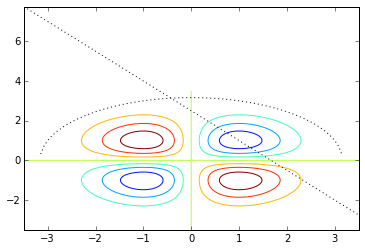

In [132]:
# Q6
def f(x0, x1):
    return -x0*x1*np.exp(-(x0**2+x1**2)/2)
x = np.linspace(-3.5, 3.5, 100)
y = np.linspace(-3.5, 3.5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y).T
plt.contour(X, Y, Z,np.arange(-0.4,0.4,0.1))
plt.plot(x, (10 - x**2)**(1/2), 'k:', linewidth=1)
plt.plot(x, (5-3*x)/2, 'k:', linewidth=1)

**Question 2 (15 points).**

A milkmaid is at point A and needs to get to point B. However, she also needs to fill a pail of water from the river en route from A to B. The equation of the river's path is shown in the figure below. What is the minimum distance she has to travel to do this?

1. Solve using `scipy.optimize` and constrained minimization.
2. 2. Create a plot of the solution using matplotlib (similar to provided figure but with optimal path added).

Note: Beware of local optima. 

![Milkmaid problem](milkmaid.png)

The minimum distance is: 9.96339831482


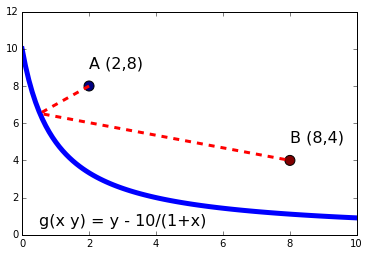

In [133]:
x = np.linspace(0, 10, 100)
plt.xlim([0, 10])
plt.plot(x, 10.0/(1+x), 'b', linewidth=5)
plt.scatter([2,8], [8,4], c=[0,1], s=100)
plt.text(8, 5, 'B (8,4)', fontsize=16)
plt.text(2, 9, 'A (2,8)', fontsize=16)
plt.text(0.5, 0.5, 'g(x y) = y - 10/(1+x)', fontsize=16)

def dist(x):
    return ((2-x[0])**2+(8-x[1])**2)**(0.5) + ((8-x[0])**2+(4-x[1])**2)**(0.5)

cons = ({'type':'eq',
         'fun': lambda x: np.array([-x[1]+ 10/(1+x[0])])})
min = optimize.minimize(dist, (1,1), constraints = cons)
print("The minimum distance is:",min.fun)

plt.plot([2,min.x[0],8], [8,min.x[1],4], 'r', linewidth=3, linestyle="dashed")

Background to Q3 - Q5
----

Latent Semantic Analysis (LSA) is a method for reducing the dimnesionality of documents treated as a bag of words. It is used for document classification, clustering and retrieval. For example, LSA can be used to search for prior art given a new patent application. In this homework, we will implement a small library for simple latent semantic analysis as a practical example of the application of SVD. The ideas are very similar to PCA.

We will implement a toy example of LSA to get familiar with the ideas. If you want to use LSA or similar methods for statiscal language analyis, the most efficient Python library is probably [gensim](https://radimrehurek.com/gensim/) - this also provides an online algorithm - i.e. the training information can be continuously updated. Other useful functions for processing natural language can be found in the [Natural Lnaguage Toolkit](http://www.nltk.org/).

**Note**: The SVD from scipy.linalg performs a full decomposition, which is inefficient since we only need to decompose until we get the first k singluar values. If the SVD from `scipy.linalg` is too slow, please use the `sparsesvd` function from the [sparsesvd](https://pypi.python.org/pypi/sparsesvd/) package to perform SVD instead.  You can install in the usual way with 
```
!pip install sparsesvd
```

Then import the following
```python
from sparsesvd import sparsesvd 
from scipy.sparse import csc_matrix 
```

and use as follows
```python
sparsesvd(csc_matrix(M), k=10)
```



In [134]:
!pip install sparsesvd
import numpy as np
import collections
import string
from pandas import DataFrame
from sparsesvd import sparsesvd 
from scipy.sparse import csc_matrix
from scipy import stats

You are using pip version 7.1.2, however version 8.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


**Question 3 (20 points)**: Write 3 functions to calculate the term frequency (tf), the inverse document frequency (idf) and the product (tf-idf). Each function should take a single argument `docs`, which is a dictionary of (key=identifier, value=dcoument text) pairs, and return an appropriately sized array. Convert '-' to ' ' (space), remove punctuation, convert text to lowercase and split on whitespace to generate a collection of terms from the dcoument text.

- tf = the number of occurrences of term $i$ in document $j$
- idf = $\log \frac{n}{1 + \text{df}_i}$ where $n$ is the total number of documents and $\text{df}_i$ is the number of documents in which term $i$ occurs.

Print the table of tf-idf values for the following document collection

```
s1 = "The quick brown fox"
s2 = "Brown fox jumps over the jumps jumps jumps"
s3 = "The the the lazy dog elephant."
s4 = "The the the the the dog peacock lion tiger elephant"

docs = {'s1': s1, 's2': s2, 's3': s3, 's4': s4}
```

Note: You can use either a numpy array or pandas dataframe to store the matrix. However, we suggest using a Pnadas dataframe since that will allow you to keep track of the row (term) and column (document) names in a single object. Of course, you could also maintain a numpy matrix, a list of terms, and a list of documents separately if you prefer.





In [135]:
s1 = "The quick brown fox"
s2 = "Brown fox jumps over the jumps jumps jumps"
s3 = "The the the lazy dog elephant."
s4 = "The the the the the dog peacock lion tiger elephant"
docs = {'s1': s1, 's2': s2, 's3': s3, 's4': s4}

def tf(docs):
    def t_f(s):
        s = s.lower().translate(dict.fromkeys(map(ord, string.punctuation)))
        s = collections.Counter(s.split())
        return(s)
    df = DataFrame({k: t_f(v) for k, v in docs.items()}).fillna(0)
    return df

def idf(docs):
    n = len(docs)
    df = (tf(docs)>0).sum(axis=1)
    return(np.log(n/(1+df)))

def tf_idf(docs):
    return(tf(docs).multiply(idf(docs), axis = 0))

tf_idf(docs)

,s1,s2,s3,s4
brown,0.287682,0.287682,0.000000,0.000000
dog,0.000000,0.000000,0.287682,0.287682
elephant,0.000000,0.000000,0.287682,0.287682
fox,0.287682,0.287682,0.000000,0.000000
jumps,0.000000,2.772589,0.000000,0.000000
lazy,0.000000,0.000000,0.693147,0.000000
lion,0.000000,0.000000,0.000000,0.693147
over,0.000000,0.693147,0.000000,0.000000
peacock,0.000000,0.000000,0.000000,0.693147
quick,0.693147,0.000000,0.000000,0.000000


**Question 4 (20 points)**

1. Write a function that takes a matrix $M$ and an integer $k$ as arguments, and reconstructs a reduced matrix using only the $k$ largest singular values. Use the `scipy.linagl.svd` function to perform the decomposition. This is the least squares approximation to the matrix $M$ in $k$ dimensions.

2. Apply the function you just wrote to the following term-frequency matrix for a set of $9$ documents using $k=2$ and print the reconstructed matrix $M'$.
```
M = np.array([[1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 2, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1]])
```

3. Calculate the pairwise correlation matrix for the original matrix M and the reconstructed matrix using $k=2$ singular values (you may use [scipy.stats.spearmanr](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) to do the calculations). Consider the fist 5 sets of documents as one group $G1$ and the last 4 as another group $G2$ (i.e. first 5 and last 4 columns). What is the average within group correlation for $G1$, $G2$ and the average cross-group correlation for G1-G2 using either $M$ or $M'$. (Do not include self-correlation in the within-group calculations.).

In [136]:
import scipy.linalg as la

def svd_approx(M, k):
    """Returns the matrix M reconstructed using only k singluar values"""
    U, s, V = la.svd(M, full_matrices=False)
    s[k:] = 0
    M_ = U.dot(np.diag(s).dot(V))
    return(M_)

M = np.array([[1, 0, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 2, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 1]])

Mprime = svd_approx(M, 2)
Mprime

array([[ 0.16205797,  0.40049828,  0.37895454,  0.46756626,  0.17595367,
        -0.05265495, -0.11514284, -0.15910198, -0.09183827],
       [ 0.14058529,  0.36980077,  0.32899603,  0.40042722,  0.16497247,
        -0.03281545, -0.07056857, -0.09676827, -0.04298073],
       [ 0.15244948,  0.50500444,  0.35793658,  0.41010678,  0.23623173,
         0.02421652,  0.05978051,  0.0868573 ,  0.12396632],
       [ 0.25804933,  0.84112343,  0.60571995,  0.69735717,  0.39231795,
         0.03311801,  0.08324491,  0.12177239,  0.18737973],
       [ 0.44878975,  1.23436483,  1.0508615 ,  1.26579559,  0.55633139,
        -0.07378998, -0.15469383, -0.20959816, -0.04887954],
       [ 0.15955428,  0.5816819 ,  0.37521897,  0.41689768,  0.27654052,
         0.05590374,  0.1322185 ,  0.18891146,  0.21690761],
       [ 0.15955428,  0.5816819 ,  0.37521897,  0.41689768,  0.27654052,
         0.05590374,  0.1322185 ,  0.18891146,  0.21690761],
       [ 0.21846278,  0.54958058,  0.51096047,  0.62805802,  0

In [137]:
# We compare M and Mprime, which is the reconstructed matrix
# The first is within G1
# Second is within G2
# Third is cross groups
corr = stats.spearmanr(M)[0]
print(corr[:5, :5][np.tril_indices_from(corr[:5, :5], 1)].mean(),corr[5:, 5:][np.tril_indices_from(corr[5:, 5:], 1)].mean(),corr[:5, 5:].mean())

corr = stats.spearmanr(Mprime)[0]
print(corr[:5, :5][np.tril_indices_from(corr[:5, :5], 1)].mean(),corr[5:, 5:][np.tril_indices_from(corr[5:, 5:], 1)].mean(),corr[:5, 5:].mean())

0.264277239875 0.662696798168 -0.307562188906
0.897650209404 0.993544916622 -0.677281308193


**Question 5 (20 points)**. Clustering with LSA

1. Begin by loading a pubmed database of selected article titles using:
```python
import pickle
docs = pickle.load(open('pubmed.pic', 'rb'))
```
    Create a tf-idf matrix for every term that appears at least once in any of the documents. What is the shape of the tf-idf matrix? 

2. Perform SVD on the tf-idf matrix to obtain $U \Sigma V^T$ (often written as $T \Sigma D^T$ in this context with $T$ representing the terms and $D$ representing the documents). If we set all but the top $k$ singular values to 0, the reconstructed matrix is essentially $U_k \Sigma_k V_k^T$, where $U_k$ is $m \times k$, $\Sigma_k$ is $k \times k$ and $V_k^T$ is $k \times n$. Terms in this reduced space are represented by $U_k \Sigma_k$ and documents by $\Sigma_k V^T_k$. Reconstruct the matrix using the first $k=10$ singular values.

3. Use agglomerative hierachical clustering with complete linkage to plot a dendrogram and comment on the likely number of  document clusters with $k = 100$. Use the dendrogram function from [SciPy ](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

4. Determine how similar each of the original documents is to the new document `mystery.txt`. Since $A = U \Sigma V^T$, we also have $V = A^T U S^{-1}$ using orthogonality and the rule for transposing matrix products. This suggests that in order to map the new document to the same concept space, first find the tf-idf vector $v$ for the new document - this must contain all (and only) the terms present in the existing tf-idx matrix. Then the query vector $q$ is given by $v^T U_k \Sigma_k^{-1}$. Find the 10 documents most similar to the new document and the 10 most dissimilar. 

5. Many documents often have some boilerplate material such as organization information, Copyright, etc. at the front or back of the document. Does it matter that the front and back matter of each document is essentially identical for either LSA-based clustering (part 3) or information retrieval (part 4)? Why or why not?

In [138]:
# Q1
import pickle
docs = pickle.load(open('pubmed.pic', 'rb'))
df = tf_idf(docs)
df.shape

(6906, 178)

In [139]:
# Q2
T, s, D = sparsesvd(csc_matrix(df), k=10)
df_prime = T.T.dot(np.diag(s).dot(D))
print(df_prime)

[[ 0.01123031 -0.08485861  0.05204088 ...,  0.01936177  0.1820454
  -0.02620365]
 [ 0.00566557  0.04555995  0.01520013 ...,  0.03732856  0.05225018
   0.06148543]
 [-0.00219459 -0.08859928  0.06857936 ..., -0.06667848 -0.10601548
  -0.06143467]
 ..., 
 [ 0.00659898  0.00271504  0.01527595 ...,  0.00093522  0.03801025
   0.00330141]
 [ 0.01444227  0.25876364  0.04940996 ...,  0.21248925  0.05404075
   0.34365746]
 [ 0.00708504  0.01883644  0.01659023 ...,  0.01436447  0.06806784
   0.02658226]]


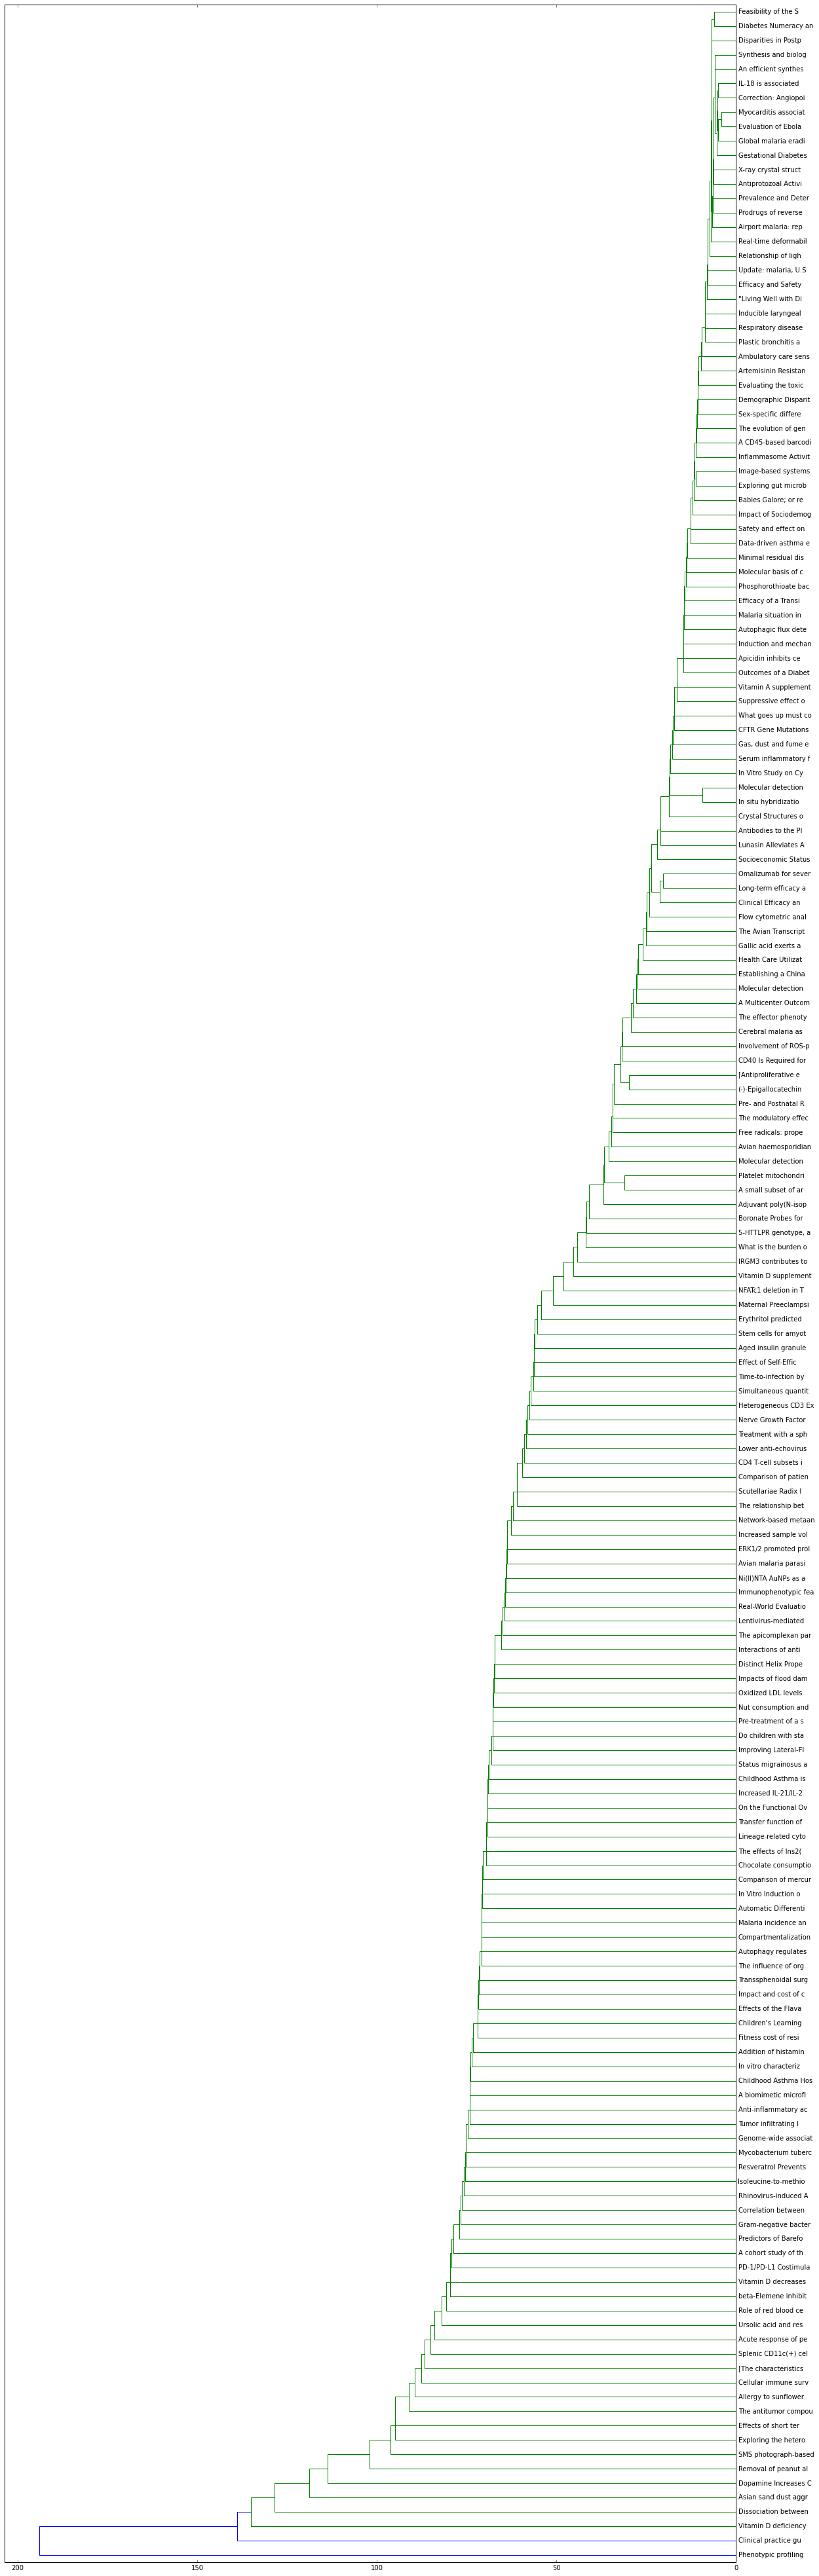

In [140]:
# Q3, using euclidean distance
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

plt.figure(figsize=(20,70))
T, s, D = sparsesvd(csc_matrix(df), k=100)
x = np.diag(s).dot(D).T
data_link = linkage(pdist(x, metric='euclidean'))
labels = [c[:20] for c in df.columns[:]]
dendrogram(data_link, orientation='right', labels=labels)
plt.show()

In [141]:
# Q4
T, s, D = sparsesvd(csc_matrix(df), k=100)

with open('mystery.txt', 'rb') as f:
    text = f.read()
docs = {'doc': text.decode("utf-8")}
terms = tf_idf(docs)
query_terms = df.join(terms).fillna(0)['doc']

In [142]:
q = query_terms.T.dot(T.T.dot(np.diag(1.0/s)))

In [143]:
def euclidean_dist(u,v):
    return np.sqrt(u**2-v**2).sum(axis = -1)
ranked_docs = df.columns[np.argsort(euclidean_dist(q, x))][::-1]

# First 10
ranked_docs[:10]

Index(['beta-Elemene inhibits the proliferation of esophageal squamous cell carcinoma by regulating long noncoding RNA-mediated inhibition of hTERT expression.',
       'Correlation between osteocalcin positive endothelial progenitor cells and spotty calcification in patients with coronary artery disease.',
       'Exploring gut microbes in human health and disease: Pushing the envelope.',
       'Evaluation of Ebola virus Inactivation Procedures for Plasmodium falciparum Malaria Diagnostics.',
       'Evaluating the toxic and beneficial effects of lichen extracts in normal and diabetic rats.',
       'Establishing a China malaria diagnosis reference laboratory network for malaria elimination.',
       'Erythritol predicted to inhibit permeation of water and solutes through the conducting pore of P. falciparum aquaporin.',
       'Efficacy of a Transition Theory-Based Discharge Planning Program for Childhood Asthma Management.',
       'Efficacy and Safety of Saxagliptin as Add-On Ther

In [144]:
# Last 10

ranked_docs[-10:]

Index(['Myocarditis associated with Plasmodium vivax malaria: a case report.',
       'Outcomes of a Diabetes Education Program for Registered Nurses Caring for Individuals With Diabetes.',
       'On the Functional Overlap between Complement and Anti-Microbial Peptides.',
       'Omalizumab for severe allergic asthma in clinical trials and real-life studies: what we know and what we should address.',
       'Nut consumption and risk of mortality in the Physicians' Health Study.',
       'Ni(II)NTA AuNPs as a low-resource malarial diagnostic platform for the rapid colorimetric detection of Plasmodium falciparum Histidine-Rich Protein-2.',
       'Network-based metaanalysis identifies HNF4A and PTBP1 as longitudinally dynamic biomarkers for Parkinson's disease.',
       'Nerve Growth Factor Potentiates Nicotinic Synaptic Transmission in Mouse Airway Parasympathetic Neurons.',
       'NFATc1 deletion in T lymphocytes inhibits the allergic trait in a murine model of asthma.',
       '"Liv

Q5.5
Many documents often have some boilerplate material such as organization information, Copyright, etc. at the front or back of the document. Does it matter that the front and back matter of each document is essentially identical for either LSA-based clustering (part 3) or information retrieval (part 4)? Why or why not?

We don't need to worry about these kind of common terms because inverse-document-frequency is already penalizing these terms by assigning small weights on them. For instance, if a term shows up in every document, it will actually get a weight of 0, which means it doesn't affect LSA-based clustering